In [126]:
import pandas as pd
import numpy as np

In [127]:
df0=pd.read_csv("swr.csv")
df0.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [128]:
df = df0.drop(["HDI for year","country-year","suicides/100k pop"],axis=1)
df.head()

,country,year,sex,age,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",796,Boomers


In [129]:
df = df.rename(columns={" gdp_for_year ($) ":"gdp_for_year","gdp_per_capita ($)":"gdp_per_capita"})
df.head()

,country,year,sex,age,suicides_no,population,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",796,Boomers


In [130]:
#to check absolute values for various indicators
df_check = df.drop(["population","gdp_for_year","gdp_per_capita"],axis=1)
df_check.head()

,country,year,sex,age,suicides_no,generation
0,Albania,1987,male,15-24 years,21,Generation X
1,Albania,1987,male,35-54 years,16,Silent
2,Albania,1987,female,15-24 years,14,Generation X
3,Albania,1987,male,75+ years,1,G.I. Generation
4,Albania,1987,male,25-34 years,9,Boomers


In [137]:
by_year = df_check.groupby('year').sum()
by_year 

,suicides_no
year,
1985,116063
1986,120670
1987,126842
1988,121026
1989,160244
1990,193361
1991,198020
1992,211473
1993,221565


In [148]:
by_count = df_check.groupby('country').sum()
by_count.drop(["year"],axis=1)

,suicides_no
country,
Albania,1970
Antigua and Barbuda,11
Argentina,82219
Armenia,1905
Aruba,101
Australia,70111
Austria,50073
Azerbaijan,1656
Bahamas,93


In [226]:
by_gender = df_check.groupby('sex').sum()
by_gender.drop(["year"],axis=1)

,suicides_no
sex,
female,1559510
male,5188910


In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

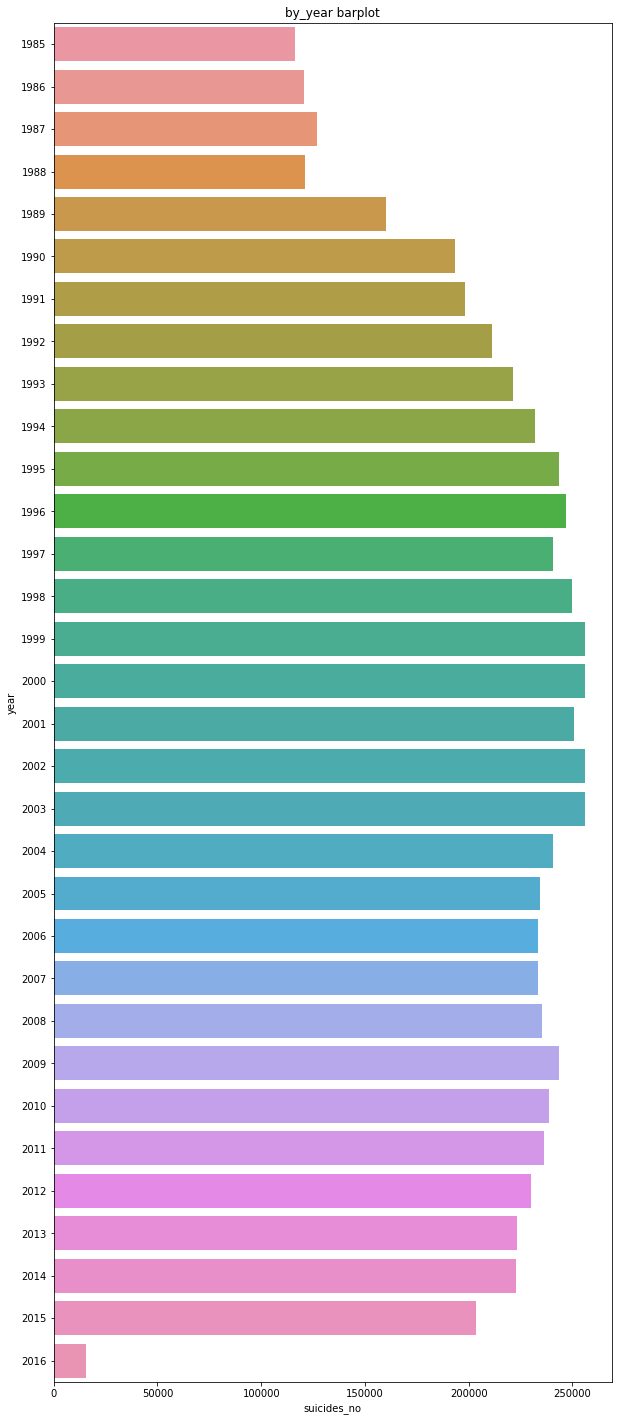

In [228]:
plt.figure(figsize=(10,25))
ax = sns.barplot(x="suicides_no", y="year", data=by_year, orient = "h")
plt.title('by_year barplot')
plt.show()

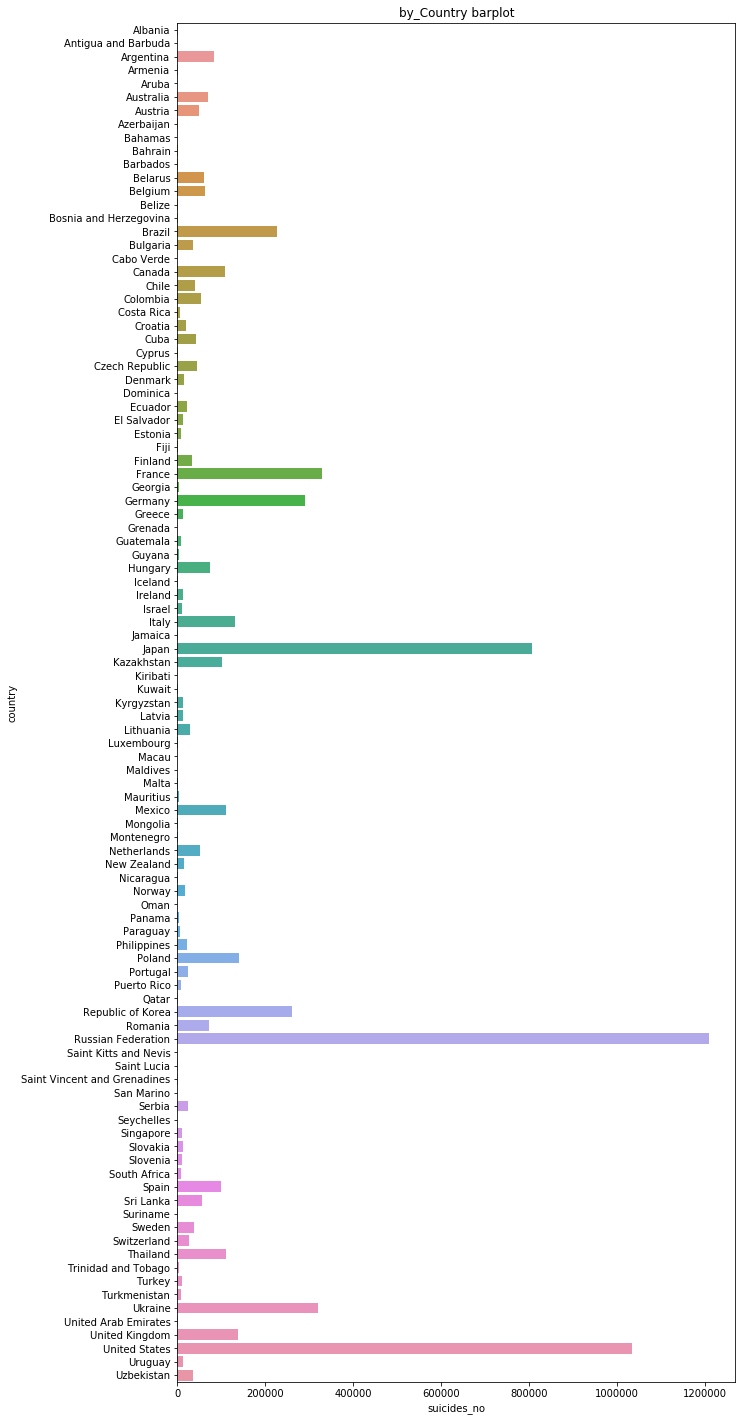

In [229]:
plt.figure(figsize=(10,25))
ax = sns.barplot(x="suicides_no", y="country", data=by_count, orient = "h")
plt.title('by_Country barplot')
plt.show()

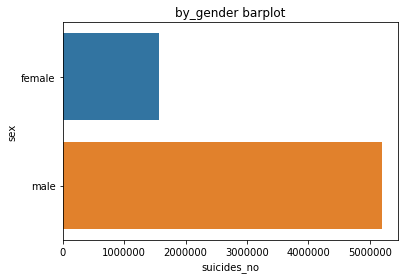

In [237]:
by_gender.reset_index(inplace=True)
sns.barplot(x="suicides_no", y="sex", data=by_gender, orient = "h")
plt.title('by_gender barplot')
plt.show()

In [238]:
by_age = df_check.groupby('age').sum()
by_age.drop(["year"],axis=1)

,suicides_no
age,
15-24 years,808542
25-34 years,1123912
35-54 years,2452141
5-14 years,52264
55-74 years,1658443
75+ years,653118


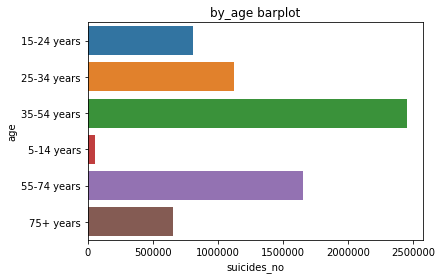

In [239]:
by_age.reset_index(inplace=True)
sns.barplot(x="suicides_no", y="age", data=by_age, orient = "h")
plt.title('by_age barplot')
plt.show()

In [245]:
#by_year['suicides_no'].plot()
#plt.title('Graph')
#plt.axhline(y=52720, color='black')